<a href="https://colab.research.google.com/github/someshsingh22/CTE-Intro-To-Machine-Learning/blob/master/CTE-Intro-To-Machine-Learning/Week-1%20Getting%20Started/chaotic_ts_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import time
import numpy as np
import matplotlib.pyplot as plt

In [0]:
import collections
import numpy as np


def mackey_glass(sample_len=1000, tau=17, seed=None, n_samples = 1):
    '''
    mackey_glass(sample_len=1000, tau=17, seed = None, n_samples = 1) -> input
    Generate the Mackey Glass time-series. Parameters are:
        - sample_len: length of the time-series in timesteps. Default is 1000.
        - tau: delay of the MG - system. Commonly used values are tau=17 (mild 
          chaos) and tau=30 (moderate chaos). Default is 17.
        - seed: to seed the random generator, can be used to generate the same
          timeseries at each invocation.
        - n_samples : number of samples to generate
    '''
    delta_t = 6
    history_len = tau * delta_t 
    # Initial conditions for the history of the system
    timeseries = 1.2
    
    if seed is not None:
        np.random.seed(seed)

    samples = []

    for _ in range(n_samples):
        history = collections.deque(1.2 * np.ones(history_len) + 0.2 * \
                                    (np.random.rand(history_len) - 0.5))
        # Preallocate the array for the time-series
        inp = np.zeros((sample_len,1))
        
        for timestep in range(sample_len):
            for _ in range(delta_t):
                xtau = history.popleft()
                history.append(timeseries)
                timeseries = history[-1] + (0.2 * xtau / (1.0 + xtau ** 10) - \
                             0.1 * history[-1]) / delta_t
            inp[timestep] = timeseries
        
        # Squash timeseries through tanh
        inp = np.tanh(inp - 1)
        samples.append(inp)
    return samples


In [0]:
x1=mackey_glass(1000,17)
x2=mackey_glass(1000,30)

In [0]:
len(x1[0])

1000

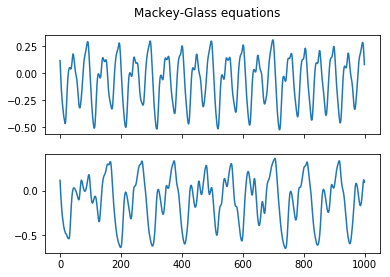

In [0]:
t=np.linspace(0,999,1000)
f, axarr = plt.subplots(2, sharex=True)
f.suptitle('Mackey-Glass equations')
axarr[0].plot(t, x1[0][:], label='tau = 17')
axarr[1].plot(t, x2[0][:], label='tau = 30')

In [0]:
x1 = x1[0][:]
x2 = x2[0][:]

In [0]:
data_size =1000
batch_time =4

In [0]:
sample_x = np.zeros((997,4))
sample_y = np.zeros((997))

In [0]:
for i in range(data_size-batch_time):
  sample_x[i][0] = x1[i]
  sample_x[i][1] = x1[i+1]
  sample_x[i][2] = x1[i+2]
  sample_x[i][3] = x1[i+3]
  sample_y[i] = x1[i+4]

In [0]:
sample_x

array([[ 0.1157483 ,  0.0471653 , -0.02231617, -0.07609758],
       [ 0.0471653 , -0.02231617, -0.07609758, -0.1365657 ],
       [-0.02231617, -0.07609758, -0.1365657 , -0.18354483],
       ...,
       [ 0.28040177,  0.26296367,  0.23146848,  0.18770657],
       [ 0.26296367,  0.23146848,  0.18770657,  0.13536132],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

In [0]:
train_x = sample_x[:800]
train_y = sample_y[:800]
test_x = sample_x[800:]
test_y = sample_y[800:]

In [0]:
len(test_x)

197

In [0]:
x1_mean = np.sum(x1)/len(x1)
x1_mean

-0.06463693915560656

In [0]:
k=5

In [0]:
pred_y = np.zeros_like(test_y)
mse_y = np.zeros_like(test_y)
den = np.zeros_like(mse_y)

In [0]:
for i in range(len(test_x)):
  t_x = test_x[i]
  t_y = test_y[i]
  j=0
  diff_arr = np.zeros(len(train_x))
  for tr_x in train_x:
    diff = np.sum((tr_x - t_x)**2)
    diff_arr[j] = diff
    j+=1
  idx = np.argpartition(diff_arr, k)
  idx = idx[:k]
  sum_y = 0
  for j in idx:
    sum_y += train_y[j]
  mean_y = sum_y/k
  pred_y[i] = mean_y
  mse_y[i] = (t_y - mean_y)**2
  den[i] = (x1_mean- mean_y)**2

In [0]:
test_y[:5],pred_y[:5]

(array([0.22323165, 0.23046781, 0.22266913, 0.20016483, 0.16584508]),
 array([0.21091508, 0.23092076, 0.24866464, 0.2538528 , 0.190654  ]))

In [0]:
rmse = np.sum(np.sqrt(mse_y))/len(mse_y)
rmse # best score for 5 amongst k=3,5,10

0.011654774955183123

In [0]:
nrmse = np.sum(np.sqrt(mse_y))/np.sum(np.sqrt(den))
nrmse

0.06239381475121648